# Análise - Aula 2


## Gráficos de pizza/ Gráfico de torta-Pie Chart

Os gráficos de pizza são úteis para apresentar proporções. Às vezes é interessante efetuar comparações entre os valores de uma categoria em relação ao todo.

**Matplotlib**
- [estilo para cores](https://matplotlib.org/3.1.0/gallery/style_sheets/style_sheets_reference.html)
- [argumentos e atributos para gráfico de pizza](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.pie.html)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

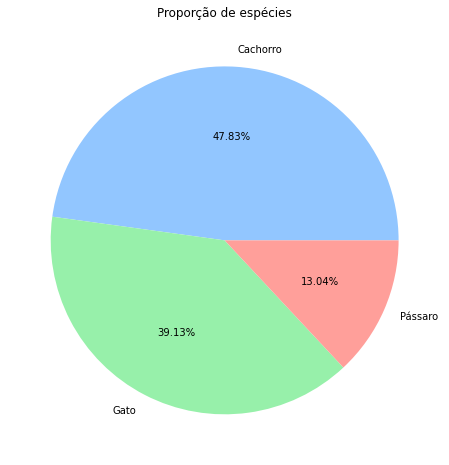

In [14]:
# Criando gráfico de pizza

# Criamos as listas com os rótulos e a quantidade
# Lembrando que o matplotlib só trabalha com dados sequenciais
# Ou seja, apenas com listas dos dados
especie = ['Cachorro', 'Gato', 'Pássaro']
quantidade  = [110, 90, 30]

# Definimos o tamanho da figura (8,8) polegadas
plt.figure(figsize=(8,8))

# Definimos o estilo usando uma paleta de cores do seaborn
plt.style.use('seaborn-pastel')

# Definindo o título
plt.title('Proporção de espécies')

# Geramos o gráfico de pizza/torta usando a função .pie()
# Em x, recebemos os dados quantitativos
# Em labels, recebemos as nomenclaturas
# Se atente em deixar a nomenclatura na mesma ordem dos dados de acordo com a correspondência dos valores
# autopct é um atributo para gerar o percentual em cima das fatias
# Ele recebe um valor str que define como o percentual vai ser gerado
# O segundo algarismo tem a ver com a quantidade de casas decimais
# A execução do plt.pie() sobre os dados recebidos já cálculo automaticamente as proporções e os representa nas fatias
plt.pie(x=quantidade, labels = especie, autopct='%1.2f%%')

# Mostramos a visualização aqui
plt.show()

### Gráfico de pizza - variação - Gráfico de rosca (donut chart)

Esse tipo de gráfico tem a área central removida

- Dessa forma, avaliamos ângulos ao invés de área de fatias.
- É mais útil quando há várias categorias

Observamos abaixo um gráfico de pizza para comparar com o gráfico de rosca que será criado logo após

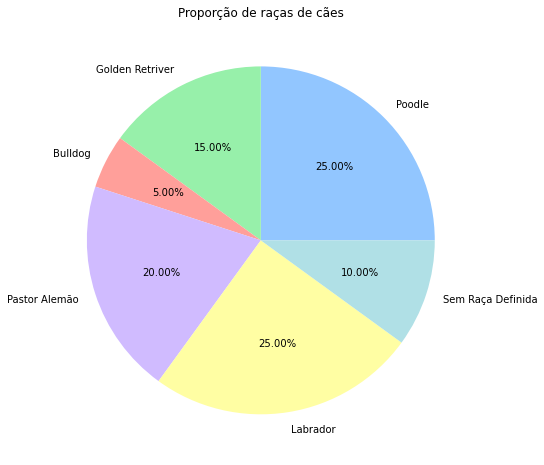

In [20]:

races = ['Poodle', 'Golden Retriver', 'Bulldog', 'Pastor Alemão', 'Labrador', 'Sem Raça Definida']
quant_races = [25,15,5,20,25,10]


plt.figure(figsize=(8,8))


plt.title('Proporção de raças de cães')

plt.pie(x=quant_races, labels=races, autopct = '%1.2f%%')

plt.show()

**Perceba que quando há muitos valores da categoria, se torna complicado efetuar a comparação e até um pouco confuso, mesmo com o percentual explícito. Para contorna essa situação, podemos utilizar um gráfico de rosca**

### Aplicando gráfico de rosca no exemplo anterior

O matplotlib não possui função para criar um gráfico de rosca, mas podesse contornar isso criando um gráfico de pizza e posteriormente inserindo um círculo no centro.

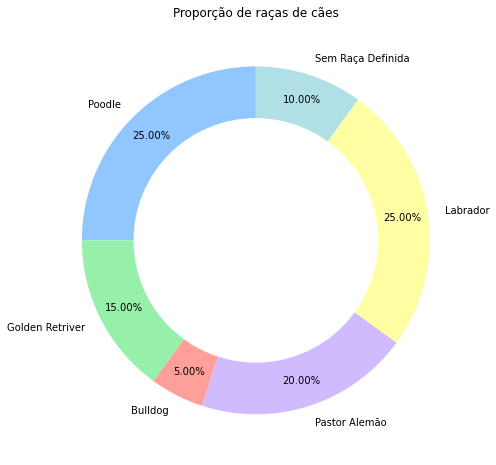

In [39]:
# Definimos a lista com os rótulos das variáveis para a categoria espécies
# Definimos a lista para os valores de quantidade de cada categoria
races = ['Poodle', 'Golden Retriver', 'Bulldog', 'Pastor Alemão', 'Labrador', 'Sem Raça Definida']
quant_races = [25,15,5,20,25,10]

# Definimos o tamanho da figura (8,8) polegadas
plt.figure(figsize=(8,8))

# Criamos o título do gráfico
plt.title('Proporção de raças de cães')

# Usamos mais uma vez o método para gerar o gráfico de pizza
# Recebemos em x os valores quantitativos
# Recebemos em y os valores qualitativos
# em autopct recebemos a string que define a legenda de percetual e optamos por 2 casas decimais
# startangle é um atributo que define o ângulo de inicio com relação a posição que é plotada sem ele
# Nesse caso, damos 90 graus de giro - isso não altera as posições, só gira o gráfico em relação ao plotado por padrão
# No pctdistance, definimos o quão do centro a legenda de percentagem é afastada
# optamos por usar 0.85, que coloca a legenda de percentual em cima das fatias da rosca

plt.pie(x=quant_races, labels = races, autopct='%1.2f%%', startangle=90, pctdistance=0.85)

# Criamos um círculo com plt.Circle
# plt.Circle recebe xy para o centro do círculo. Se modificarmos aqui, o círculo se desloca parar fora do centro do gráfico
# plt.Circle recebe em radius o raio do círculo. Isso define o tamnho do círculo
# plt.Circle recebe em color a cor do círculo. Definimos como branco
# Atribuimos o círculo a variável my_circle
my_circle=plt.Circle(xy=(0,0), radius= 0.7, color='white')

# fazemo p receber plt.gcf() -> gcf vai pegar o gráfico gerado atualmente. Esse gráfico é o plt.pie que já foi executado
p=plt.gcf()

# usamos pegamos o gráfico atual e usamos gca para escolher o eixo do gráfico
# Adicionamos ao eixo o círculo
p.gca().add_artist(my_circle)

plt.show()

**Dicas para uso do gráfico de torta(gráfico de pizza original) e gráfico de rosca(variação rosca do pizza)**

- Dicas
    - Levasse em consideração que é difícil para percepção humana distinguir áreas.
        - Não é muito útil utilizar quando os valores da categoria tem proporção próximas demais
        - Mitigasse isso usando o gráfico de rosca
    - Quando há muitas classes da categoria, o gráfico fica poluido. De difícil percepção. 
        - Mitigasse quando se coloca o percentual, mas nem sempre é muito útil.
        - É mais adequado utilizar, qualquer variação do gráfico de pizza somente quando há poucas classes]
    - Uso desnecessário do 3D. Quando usasse essa técnica, o gráfico fica mais complicado de ser visualizado quantitativamente. Deixa de ser objetivo


# Gráfico de barra para proporções

Quando há muitas classes, podemos usar gráficos de barras para representá-los, de forma que a sua apresentação seja mais inteligível do que o uso de gráficos de pizza

**Vamos usar como exemplo dados de 16 mil jogos de video game desse link: [dataset](https://raw.githubusercontent.com/cabrau/curso-analise-visualizacao-dados-python/master/vgsales.csv)**

In [40]:
# importando pelo link
link_games = 'https://raw.githubusercontent.com/cabrau/curso-analise-visualizacao-dados-python/master/vgsales.csv'
df_games = pd.read_csv(link_games)
df_games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [42]:
# importando por arquivo no pc
df_games = pd.read_csv('vgsales.csv')
df_games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


**Vamos explorar as vendas globais por gênero através de visualização em pizza (torta e rosca)**

In [45]:
# Definimos o gênero como índice e somamos os valores de atributos
df_games_generos = df_games.groupby(by='Genre').sum()
df_games_generos

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,,,
Action,26441383,6531731.0,877.83,525.00,159.95,187.38,1751.18
Adventure,14831165,2562375.0,105.80,64.13,52.07,16.81,239.04
Fighting,6484242,1675871.0,223.59,101.32,87.35,36.68,448.91
Misc,14889052,3432412.0,410.24,215.98,107.76,75.32,809.96
Platform,6137545,1755347.0,447.05,201.63,130.77,51.59,831.37
Puzzle,5603136,1144994.0,123.78,50.78,57.31,12.55,244.95
Racing,9943933,2457934.0,359.42,238.39,56.69,77.27,732.04
Role-Playing,12032228,2952379.0,327.28,188.06,352.31,59.61,927.37
Shooter,9653872,2571588.0,582.60,313.27,38.28,102.69,1037.37


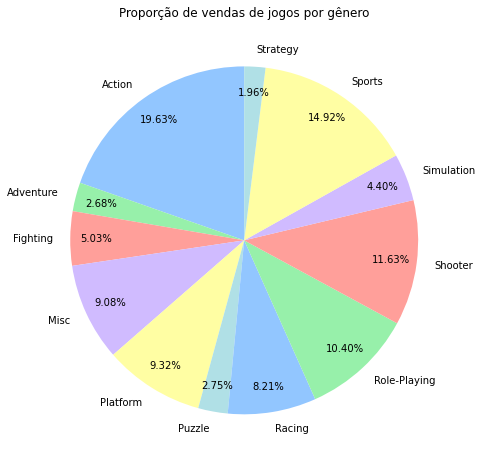

In [51]:
plt.figure(figsize=(8,8))
plt.title('Proporção de vendas de jogos por gênero')
plt.pie(x = df_games_generos['Global_Sales'], labels=df_games_generos.index, autopct='%1.2f%%', startangle=90,
       pctdistance=0.85)
plt.show()

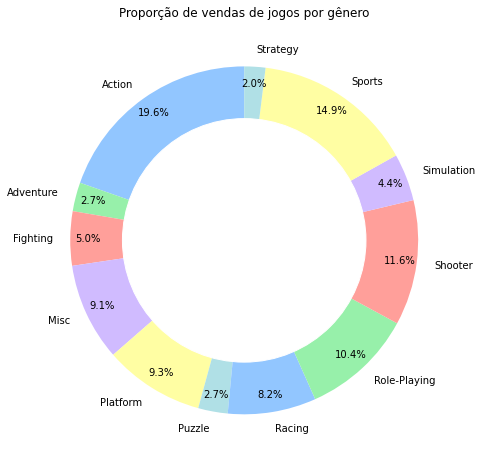

In [53]:
plt.figure(figsize=(8,8))
plt.title('Proporção de vendas de jogos por gênero')
plt.pie(x=generos['Global_Sales'], labels = generos.index, autopct='%1.1f%%',startangle=90, pctdistance=0.90)
my_circle=plt.Circle((0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

Veja como fica poluido com o gráfico de pizza, mesmo apelando para a variação rosca.

### Aplicando gráfico de barrar para proporção

Como o matplotlib não dispões de método para gráfico de barrar de porcentagem, é necessário calcular vetores com as porcentagens e exibi-las com o método bar. 

Necessitasse ordenar os dados usando pandas para que a comparação seja mais agradável

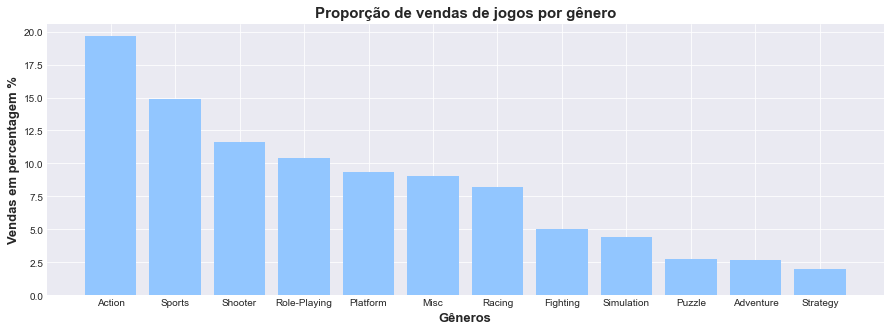

In [73]:
# Primeiro ordenamos de acordo com o total de vendas de forma decrescente
generos = generos.sort_values(by='Global_Sales', ascending=False)

# Geramos as porcentagens
porcentagens = generos['Global_Sales']*100.0/generos['Global_Sales'].sum()

# Definimos o estilo pegando o darkgrid do seaborn
plt.style.use('seaborn-darkgrid')

# Definimos o tamanho em proporção 3 para 1 
plt.figure(figsize=(15,5))

# Geramos o gráfico de barras
plt.bar(generos.index,   porcentagens)

# Definimos o título, abscissas e ordenadas
plt.title('Proporção de vendas de jogos por gênero', fontweight='bold', fontsize=15)
plt.xlabel('Gêneros', fontweight='bold', fontsize=13)
plt.ylabel('Vendas em percentagem %', fontweight='bold', fontsize=13)

# Mostramos a visualização criada
plt.show()

Podemos observar que o gráfico de barras em porcentagem é melhor para visualizar uma grande quantidade de classes por categoria. Ele é mais limpo e se baseia na comparação da proporção entre as classes

Por outro lado, os gráficos de pizzas, que se baseiam na relação de parte de um todo, perdem inteligibilidade quando há um alto número de classes envolvidas

### Gráfico de barras empilhadas

19.631094430319397

NameError: name 'ax' is not defined

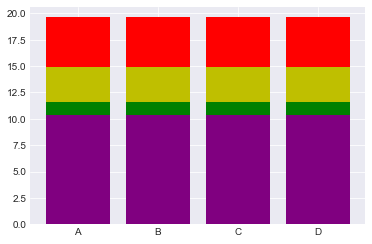

In [84]:

x = ['A', 'B', 'C', 'D']
plt.bar(x,   porcentagens[0], color='r')
plt.bar(x,   porcentagens[1], color='y')
plt.bar(x,   porcentagens[2], color='g')
plt.bar(x,   porcentagens[3], color='purple')
ax.legend(labels=generos.index())
plt.show()